In [6]:
import qsharp

In [7]:
%%qsharp
    open Microsoft.Quantum.Canon;
    open Microsoft.Quantum.Intrinsic;
    open Microsoft.Quantum.Math;
    open Microsoft.Quantum.Convert;
// This makes the DumpMachine() function available.
    open Microsoft.Quantum.Diagnostics;
    
    operation SpinOperation(theta : Double, iterations : Int) : Double {
        mutable n = 0;

        // Allocate a qubit which begins in the |0> state
        use q = Qubit();
        for i in 1..iterations {
            // Rotate the state of qubit q by theta radians
            Rx(theta,q);
            // Measure the qubit
            let result = M(q);
            // Convert this measurement result into a 0/1 integer.
            let m = ResultArrayAsInt([result]);
            // Transform the result int into spin value
            let s = 2 * m - 1;
            // Keep running count of spin states.
            set n += s;
            // Reset all the qubits to the |0> state
            Reset(q);
        }
        // Add the averaging code here after the iterations have finished.
        let average = IntAsDouble(n)/IntAsDouble(iterations);
        return average;
    }



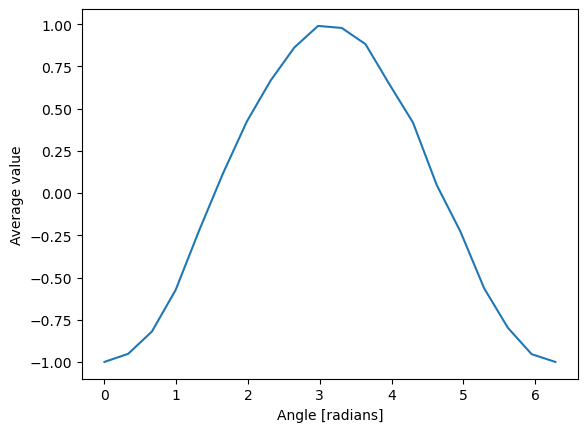

In [9]:
import numpy as np
# Define an array of angles and an empty array for the output
angle_range = np.linspace(0.0, 2 * np.pi, 20)
data = [0]*20

# Run the SpinAnsatz operation, providing the inputs above.
for i in range(20):
    operation_call = f"SpinOperation({angle_range[i]}, 1000)"
    data[i] =  qsharp.eval(operation_call)

# Output the resulting average spin values as a plot.
import matplotlib.pyplot as plt
plt.xlabel('Angle [radians]')
plt.ylabel('Average value')
plt.plot(angle_range, data)
plt.savefig("figure.png")